In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


## Loading the Dataset

In [2]:
energy_df = pd.read_excel("energy_data.xlsx") ; 
csv_file = "energy_data.csv" ;
energy_df.to_csv(csv_file, index=False) ;
print(energy_df.head()) ; 

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


## Checking for missing values

In [3]:
print("Missing values in each column:\n", energy_df.isnull().sum()) ; 

Missing values in each column:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


#### As there are no missing values we need not handle them explicitly.

## Making and displaying the correlation matrix 

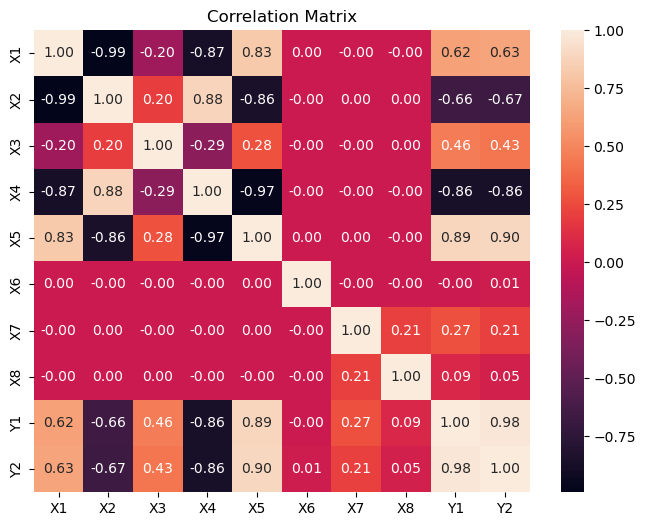

In [4]:
corr_matrix = energy_df.corr() ; 
plt.figure(figsize=(8,6)) ; 
sns.heatmap(corr_matrix, annot=True, fmt=".2f") ; 
plt.title("Correlation Matrix") ; 
plt.show() ;


## Handling the Outliers using the IQR method

In [5]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = energy_df.quantile(0.25) ; 
Q3 = energy_df.quantile(0.75) ; 

# IQR
IQR = Q3 - Q1 ; 

# Condition for outliers
outliers = (energy_df<(Q1-1.5*IQR)) | (energy_df>(Q3+ 1.5*IQR)) ; 

# Data with no outliers
energy_df_no_outliers = energy_df[~outliers.any(axis=1)] ; 

# Display the shape of the dataset after removing outliers
print(f"Original dataset size: {energy_df.shape}") ; 
print(f"Dataset size after removing outliers: {energy_df_no_outliers.shape}") ; 


Original dataset size: (768, 10)
Dataset size after removing outliers: (768, 10)


#### As there are no outliers we are good and are done with data preprocessing part 

## Defining the features and targets

In [6]:
# No outliers, dataset remains the same
X = energy_df_no_outliers.drop(columns=['Y1','Y2']).values ; 
y = energy_df_no_outliers[['Y1','Y2']].values ; 

# Adding a bias term
X = np.c_[np.ones((X.shape[0],1)),X] ; 

# Normalization of features 
scaler = StandardScaler() ; 
X[:,1:] = scaler.fit_transform(X[:,1:]) ; 

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ; 


## Implementation of multivariate linear regression model from scratch

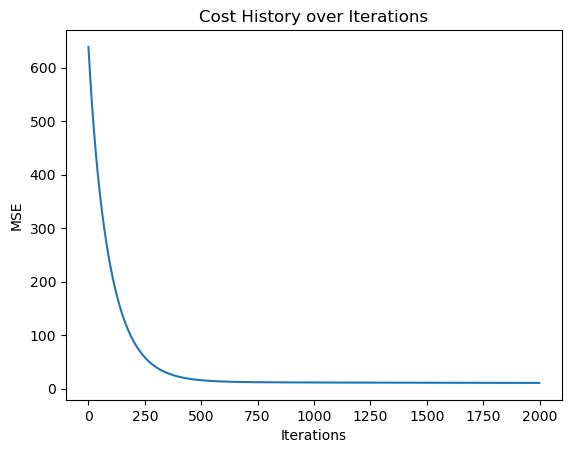

Test MSE: 11.66238981440781
Learned parameters(theta) :
[[22.264316   24.51845093]
 [-0.57374234 -0.687635  ]
 [-1.12326193 -1.14080581]
 [ 2.59523657  2.11104132]
 [-2.34872531 -2.13198723]
 [ 5.29175687  5.24165622]
 [-0.06912983  0.0276526 ]
 [ 2.70745165  1.9975893 ]
 [ 0.3201311   0.04543536]]


In [7]:
# Defining the MSE 
def mse(y_true,y_pred):
    return (np.mean((y_true-y_pred)**2)) ; 

# Defining the gradient descent function
def gradient_descent(X, y, learning_rate=0.001, iterations=1000):
    m,n = X.shape ; 
    theta = np.zeros((n, y.shape[1])) ; 
    cost_history = [] ; 
    
    for i in range(iterations):
        # Calculating the predictions
        y_pred = np.dot(X,theta) ; 
        
        # Calculation of the gradient
        gradient = (1/m)*np.dot(X.T,(y_pred-y)) ; 
        
        # Update theta
        theta-= learning_rate*gradient ; 
        
        # Calculating the cost
        cost = mse(y, y_pred) ; 
        if np.isnan(cost): # Check if it diverges
            print(f"Gradient descent diverged at iteration {i}") 
            break ;
        cost_history.append(cost) ; 
    
    return theta,cost_history ; 

# predict function
def predict(X,theta):
    return np.dot(X, theta) ; 

# Training the model
learning_rate = 0.005 ;
iterations = 2000 ; 
theta, cost_history = gradient_descent(X_train, y_train, learning_rate, iterations) ; 

# Plotting the cost
plt.plot(range(len(cost_history)), cost_history) ; 
plt.title('Cost History over Iterations') ; 
plt.xlabel('Iterations') ;
plt.ylabel('MSE') ; 
plt.show() ; 

# predictions
y_pred = predict(X_test,theta) ; 

# Calculation of MSE 
test_mse = mse(y_test, y_pred) ; 
print(f"Test MSE: {test_mse}") ; 

# Best fit parameters 
print("Learned parameters(theta) :") ;
print(theta) ;

## Implementing Linear regression with the help of sklearn

In [8]:
# Training the model using sklearn library
linear_regressor = LinearRegression() ; 
linear_regressor.fit(X_train,y_train) ; 

# prediction using sklearn model
y_pred_sklearn = linear_regressor.predict(X_test) ; 

# Calculating MSE using sklearn
test_mse_sklearn = mean_squared_error(y_test, y_pred_sklearn) ; 
print(f"Test MSE(sklearn Linear Regression):{test_mse_sklearn}") ; 

print("\n Best fit parameters according to sklearn Linear Regression:") ; 
print("Intercept (theta_0):", linear_regressor.intercept_) ; 
print("\nCoefficients (theta_1, theta_2, ...):", linear_regressor.coef_) ; 



Test MSE(sklearn Linear Regression):9.523317646942868

 Best fit parameters according to sklearn Linear Regression:
Intercept (theta_0): [22.26003576 24.51482281]

Coefficients (theta_1, theta_2, ...): [[ 0.         -6.54054491 -3.61845859  0.80890168 -3.91916361  7.21642111
  -0.03626803  2.68173981  0.32719875]
 [ 0.         -7.51424508 -4.15514954  0.14845992 -4.12354624  7.08078072
   0.06172666  1.96872768  0.05229569]]


## Implementing Ridge and Lasso regression model using sklearn

In [9]:
# Ridge regression model
ridge_reg = Ridge(alpha=1.0)  ; 
ridge_reg.fit(X_train,y_train) ; 

# predictions for Ridge regression model
y_pred_ridge = ridge_reg.predict(X_test) ;

# Lasso regression model
lasso_reg = Lasso(alpha=0.1) ; 
lasso_reg.fit(X_train ,  y_train) ; 

# predictions for Lasso regression model
y_pred_lasso = lasso_reg.predict(X_test) ; 




## Performance evaluation

Linear Regression (Manual):
R2 Score: 0.8807382490172992
MSE: 11.662389814407812
RMSE: 3.4150241308675713

Sklearn Linear Regression:
R2 Score: 0.9027050781479864
MSE: 9.523317646942868
RMSE: 3.0859873050521234

Ridge Regression:
R2 Score: 0.9021758215328629
MSE: 9.575742200944614
RMSE: 3.094469615450217

Lasso Regression:
R2 Score: 0.8942719737309928
MSE: 10.348357633884541
RMSE: 3.2168863259189844


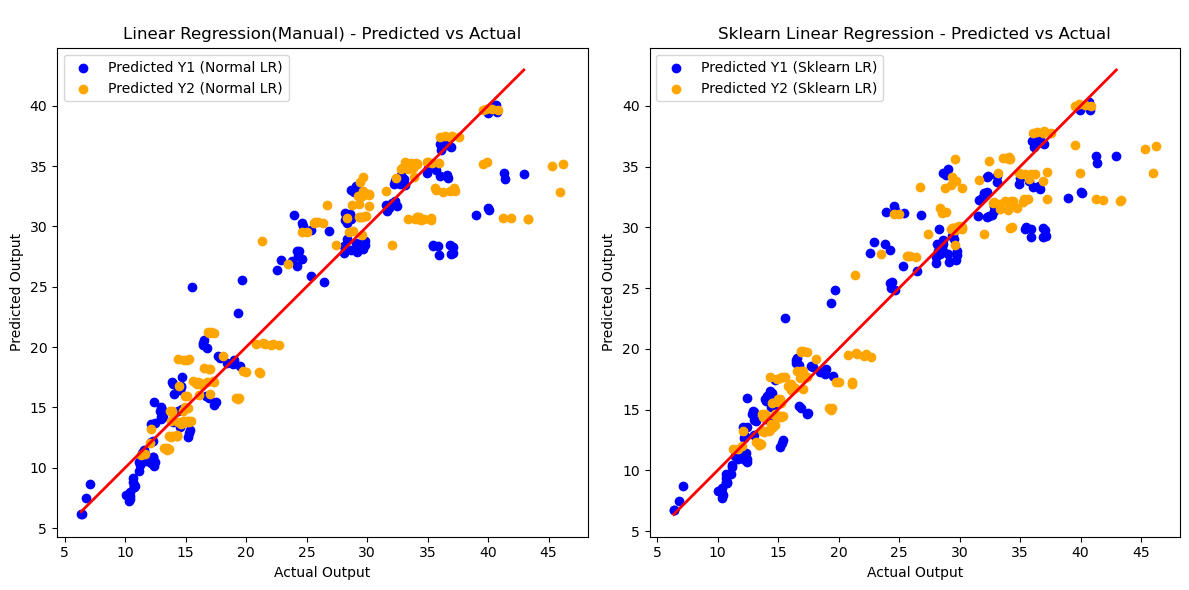

In [10]:
# Evaluating the performance metrics for each model

# Linear Regression(manual)
y_pred_normal = predict(X_test, theta) ;

# Sklearn Linear Regression
y_pred_sklearn = linear_regressor.predict(X_test) ; 

# Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test) ; 

# Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test) ;

# function which computes R2, MSE, and RMSE
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred) ;
    mse = mean_squared_error(y_true, y_pred) ;
    rmse = np.sqrt(mse) ;
    return r2, mse, rmse ;

# Performance Evaluation for Normal Linear Regression
r2_normal, mse_normal, rmse_normal = evaluate_model(y_test,y_pred_normal) ; 

# Performance Evaluation for Sklearn Linear Regression
r2_sklearn, mse_sklearn, rmse_sklearn = evaluate_model(y_test,y_pred_sklearn) ; 

# Performance Evaluation for Ridge Regression
r2_ridge, mse_ridge, rmse_ridge = evaluate_model(y_test , y_pred_ridge) ; 

# Performance Evaluation for Lasso Regression
r2_lasso, mse_lasso, rmse_lasso = evaluate_model(y_test, y_pred_lasso) ; 

# Final results
print("Linear Regression (Manual):") ; 
print(f"R2 Score: {r2_normal}") ; 
print(f"MSE: {mse_normal}") ; 
print(f"RMSE: {rmse_normal}") ; 
print("\nSklearn Linear Regression:") ; 
print(f"R2 Score: {r2_sklearn}") ;
print(f"MSE: {mse_sklearn}") ; 
print(f"RMSE: {rmse_sklearn}") ; 
print("\nRidge Regression:") ;
print(f"R2 Score: {r2_ridge}") ; 
print(f"MSE: {mse_ridge}") ;
print(f"RMSE: {rmse_ridge}") ; 
print("\nLasso Regression:") ;
print(f"R2 Score: {r2_lasso}") ; 
print(f"MSE: {mse_lasso}") ; 
print(f"RMSE: {rmse_lasso}") ; 

# Plotting Predicted vs Actual Values for Normal and Sklearn Linear Regression

plt.figure(figsize=(12, 6)) ; 
plt.subplot(1,2,1) ; 
plt.scatter(y_test[:,0], y_pred_normal[:, 0], color='blue', label='Predicted Y1 (Normal LR)') ; 
plt.scatter(y_test[:,1], y_pred_normal[:, 1], color='orange', label='Predicted Y2 (Normal LR)') ; 
plt.plot([y_test[:,0].min(), y_test[:, 0].max()], [y_test[:,0].min(), y_test[:, 0].max()], color='red', linewidth=2) ; 
plt.title("\nLinear Regression(Manual) - Predicted vs Actual") ; 
plt.xlabel("Actual Output") ; 
plt.ylabel("Predicted Output") ; 
plt.legend() ; 

# Subplot 2: Sklearn Linear Regression
plt.subplot(1,2,2) ; 
plt.scatter(y_test[:,0], y_pred_sklearn[:,0], color='blue', label='Predicted Y1 (Sklearn LR)') ; 
plt.scatter(y_test[:,1], y_pred_sklearn[:,1], color='orange', label='Predicted Y2 (Sklearn LR)') ; 
plt.plot([y_test[:,0].min(), y_test[:,0].max()], [y_test[:,0].min(), y_test[:,0].max()], color='red', linewidth=2) ; 
plt.title("Sklearn Linear Regression - Predicted vs Actual") ; 
plt.xlabel("Actual Output") ; 
plt.ylabel("Predicted Output") ; 
plt.legend() ; 

plt.tight_layout() ; 
plt.show()






Based on the above graphs and error data it is clear that Sklearn model's performance is better than manual linear regression model. Lower the errors and higher R2 score means better performance.

## Suggestions to improve energy efficiency :-

Features:
X1 -> Relative Compactness, 
X2 -> Surface Area, 
X3 -> Wall Area, 
X4 -> Roof Area, 
X5 -> Overall Height, 
X6 -> Orientation, 
X7 -> Glazing Area, 
X8 -> Glazing Area Distribution,

Targets:
Y1 -> Heating Load, 
Y2 -> Cooling Load

These are the features and targets. Using the correlation matrix we can see how a particular feature affects the target in this case heating  load being the feature of interest. Ideally we would want to decrease the heating load. So here are some suggestions to improve energy effciency :-

1. The correlation of heating load with the overall height of the building is 0.89 which means that on increasing the height of the building the heating load increases significantly , thus we need to reduce the height of the building if we want to reduce the heating load.

2. Next feature which significantly affects heating load is the roof area of the building , the correlation factor being -0.86 which means that increasing the roof area will helps us to reduce the heating load to a good extent , thus improving energy efficiency.

3. There is also a decent correlation factor (-0.66) between surface area and the heating load , which suggests that increasing the surface area will helps us to decrease the heating load .

4. Increasing the relative compactness of the building leads to higher heating load (0.62 - correlation factor) , thus we would like to have a building with less relative compactness.

These are a few observations derived from the correlation matrix which will help us to reduce the heating load and improve energy efficiency.
